### **Bike Sharing**

[Sumber data Bike Sharing](http://capitalbikeshare.com/system-data) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Bike sharing adalah sistem transportasi publik modern di mana pengguna dapat menyewa sepeda dari satu titik lokasi dan mengembalikannya ke titik lokasi lain secara otomatis melalui sistem terkomputerisasi. Saat ini, lebih dari 500 program bike sharing beroperasi di seluruh dunia dengan total lebih dari 500 ribu sepeda. Sistem ini memiliki dampak penting terhadap isu lalu lintas, lingkungan, dan kesehatan masyarakat.

Kelebihan utama dari sistem bike sharing adalah semua perjalanan terekam dengan detail, mulai dari waktu, durasi, hingga kondisi lingkungan saat peminjaman. Hal ini menjadikan dataset bike sharing sebagai “virtual sensor” yang bisa merekam pola mobilitas masyarakat di perkotaan. Dengan begitu, data ini sangat bermanfaat untuk penelitian maupun pengambilan keputusan strategis, misalnya dalam hal perencanaan transportasi dan pengelolaan sepeda.

**Problem Statement**

Salah satu tantangan dalam pengelolaan bike sharing adalah memahami **faktor-faktor yang memengaruhi jumlah peminjaman sepeda setiap jam**. Jumlah sepeda yang dipinjam bisa sangat fluktuatif tergantung musim, kondisi cuaca, maupun waktu dalam sehari. Tanpa pemahaman ini, perusahaan bike sharing bisa kesulitan dalam mengatur jumlah unit sepeda yang tersedia, sehingga bisa terjadi kekurangan pasokan di jam sibuk atau pemborosan unit di jam sepi.

Maka dari itu, penting untuk membangun sebuah model prediksi yang dapat memperkirakan jumlah sepeda yang akan dipinjam berdasarkan variabel cuaca dan waktu. **Model ini bisa menjadi dasar untuk perencanaan operasional, optimasi armada, dan peningkatan pengalaman pengguna.**

**Goals**

Tujuan dari analisis ini adalah:

1. Membangun model regresi untuk memprediksi jumlah total peminjaman sepeda (cnt) setiap jam.
2. Mengidentifikasi faktor-faktor signifikan (misalnya cuaca, suhu, kelembapan, musim, dan hari libur) yang paling memengaruhi permintaan peminjaman sepeda.
3. Menyediakan insight yang bisa membantu operator bike sharing dalam forecasting kebutuhan armada dan perencanaan strategi layanan.

**Analytic Approach**

Pendekatan analisis dimulai dengan eksplorasi data (EDA) untuk memahami distribusi dan pola jumlah peminjaman sepeda. Selanjutnya, fitur-fitur seperti waktu (hr, season, holiday) dan cuaca (temp, atemp, hum, weathersit) akan digunakan sebagai variabel prediktor.

Model regresi akan dibangun untuk memprediksi target cnt. Beberapa model bisa diuji, mulai dari regresi linear hingga model machine learning yang lebih kompleks (Random Forest, Gradient Boosting), untuk dibandingkan performanya.

**Metric Evaluation**

Metrik evaluasi yang digunakan:

1. RMSE (Root Mean Squared Error) → rata-rata akar kuadrat error prediksi.
2. MAE (Mean Absolute Error) → rata-rata error absolut.
3. MAPE (Mean Absolute Percentage Error) → rata-rata error dalam bentuk persentase.
4. R-squared (jika model linear) → untuk mengukur seberapa baik variabel prediktor menjelaskan variasi jumlah peminjaman.

Semakin rendah nilai error (RMSE, MAE, MAPE), semakin baik performa model dalam memprediksi jumlah sepeda yang dipinjam.

### **Data Understanding**

- Dataset merupakan data peminjaman sepeda dari sistem Bike Sharing.
- Setiap baris data merepresentasikan informasi terkait waktu, kondisi cuaca, serta jumlah peminjaman sepeda (casual, registered, total) pada jam tertentu.

**Attributes Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
| dteday | Date | Tanggal pencatatan data |
| season | Integer | Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| hr | Integer | Jam (0–23) |
| holiday | Integer | Apakah hari tersebut libur (1 = libur, 0 = bukan) |
| temp | Float | Suhu yang dinormalisasi dalam skala Celsius, dihitung dari rentang -8°C hingga +39°C |
| atemp | Float | Suhu yang dirasakan (apparent temperature), dinormalisasi dalam skala Celsius, dihitung dari rentang -16°C hingga +50°C |
| hum | Float | Kelembapan udara, dinormalisasi (0–1) |
| weathersit | Integer | Kondisi cuaca (1 = Clear/Partly Cloudy, 2 = Mist/Cloudy, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow) |
| casual | Integer | Jumlah pengguna yang melakukan peminjaman sepeda tanpa registrasi (casual users) |
| registered | Integer | Jumlah pengguna yang melakukan peminjaman sepeda dengan registrasi (registered users) |
| cnt | Integer | Total jumlah sepeda yang dipinjam (casual + registered) |

<br>

In [567]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [568]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


#### **Exploratory Data Analysis**

**Distribusi jumlah penyewaan sepeda**

Text(0.5, 1.0, 'Bike Rental Count (cnt) Distribution Plot')

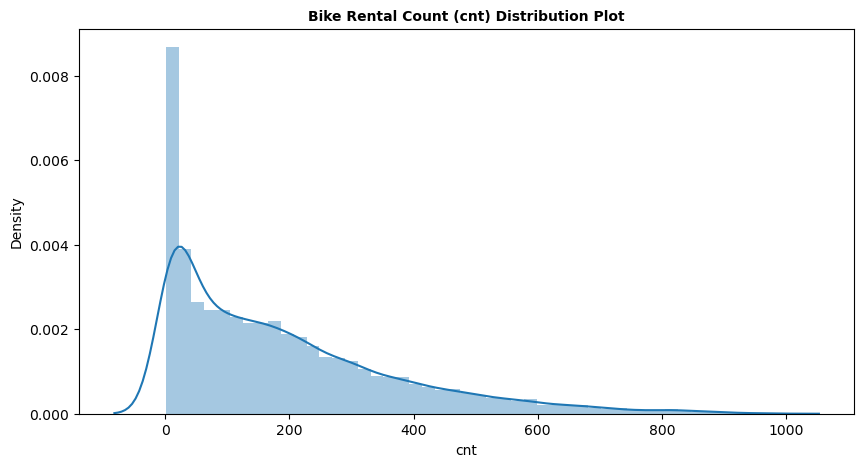

In [569]:
plt.figure(figsize=(10, 5))
sns.distplot(df['cnt'])
plt.title('Bike Rental Count (cnt) Distribution Plot', size=10, weight='bold')

Berdasarkan plot distribusi jumlah sewa sepeda di atas, terlihat bahwa pola distribusi condong ke kanan. Ini artinya, jumlah sewa sepeda per jam berkisar di antara 0-400, namun di hari-hari tertentu jumlahnya bisa melonjak drastis di kisaran 600 hingga lebih dari 1000. Untuk eksplorasi data, kita akan menggunakan angka mean.

**Eksplorasi hubungan sewa per jam dengan musim (season), cuaca (weathersit), dan hari libur (holiday)**

In [570]:
# Rata-rata peminjaman sepeda per jam (cnt)
print("Rata-rata peminjaman sepeda per jam:")
print(df.groupby('hr')['cnt'].mean().round(2))

Rata-rata peminjaman sepeda per jam:
hr
0      53.09
1      32.16
2      22.75
3      11.32
4       6.32
5      20.22
6      76.72
7     207.61
8     368.31
9     217.88
10    172.94
11    209.08
12    259.31
13    255.69
14    244.95
15    250.80
16    315.08
17    454.28
18    418.56
19    314.09
20    227.37
21    174.45
22    131.82
23     88.30
Name: cnt, dtype: float64


In [572]:
# Cek mean sewa per jam untuk tiap musim (season)
df_mean_price = df.groupby(by=['season']).agg({'cnt':'mean'}).reset_index()
df_mean_price = df_mean_price.set_index('season')
df_mean_price = df_mean_price.sort_values('cnt', ascending=False)
df_mean_price.head()


,cnt
season,
3,234.297255
2,208.101496
4,201.949293
1,110.763811


In [573]:
# Cek mean sewa per jam untuk tiap kondisi cuaca (weathersit)
df_mean_price = df.groupby(by=['weathersit']).agg({'cnt':'mean'}).reset_index()
df_mean_price = df_mean_price.set_index('weathersit')
df_mean_price = df_mean_price.sort_values('cnt', ascending=False)
df_mean_price.head()

,cnt
weathersit,
1,205.143477
2,170.830074
3,117.003086
4,74.333333


In [574]:
# Cek mean sewa per jam saat hari libur atau tidak (holiday)
df_mean_price = df.groupby(by=['holiday']).agg({'cnt':'mean'}).reset_index()
df_mean_price = df_mean_price.set_index('holiday')
df_mean_price = df_mean_price.sort_values('cnt', ascending=False)
df_mean_price.head()


,cnt
holiday,
0,190.231043
1,157.969613


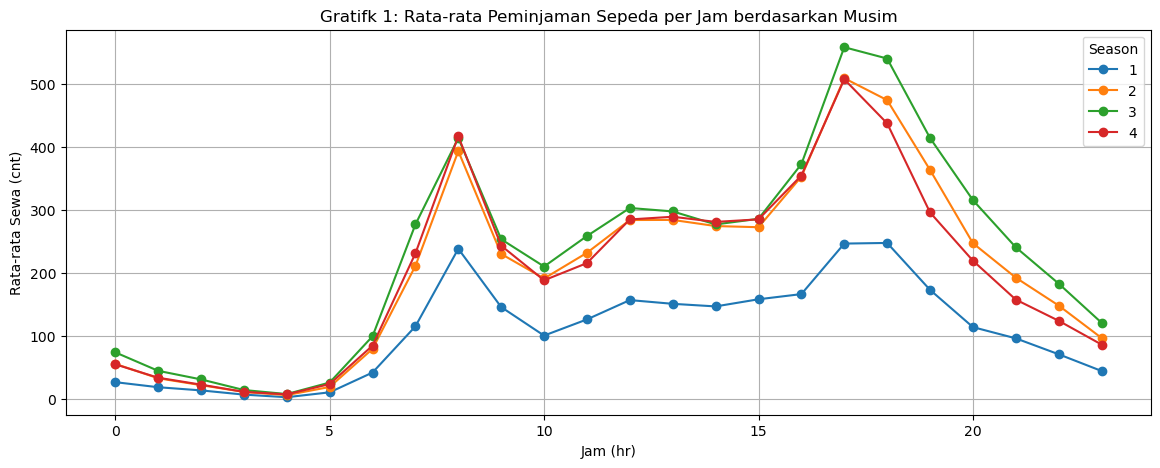

In [575]:
# Visualisasi rata-rata peminjaman sepeda per jam berdasarkan musim (line chart)
import matplotlib.pyplot as plt

# Buat pivot table (mean)
avg_by_season_pivot = df.pivot_table(
    index='hr',
    columns='season',
    values='cnt',
    aggfunc='mean'
).round(2)

# Plot line chart
pivot_plot = avg_by_season_pivot.plot(
    kind='line',
    marker='o',
    figsize=(14, 5)
)

pivot_plot.set_xlabel('Jam (hr)')
pivot_plot.set_ylabel('Rata-rata Sewa (cnt)')
pivot_plot.set_title('Gratifk 1: Rata-rata Peminjaman Sepeda per Jam berdasarkan Musim')
plt.legend(title='Season')
plt.grid(True)
plt.show()


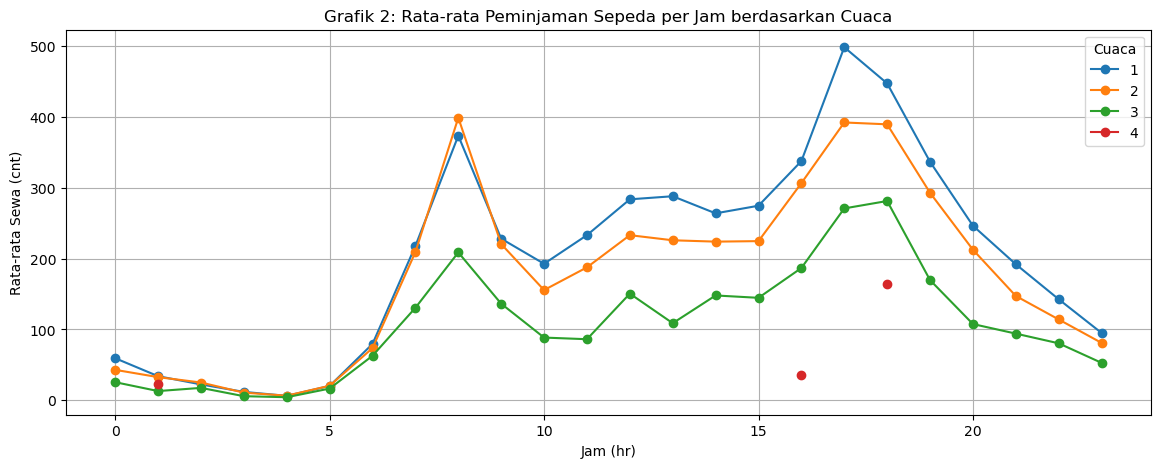

In [576]:
# Visualisasi rata-rata peminjaman sepeda per jam berdasarkan cuaca (line chart)
import matplotlib.pyplot as plt

# Buat pivot table (mean)
avg_by_season_pivot = df.pivot_table(
    index='hr',
    columns='weathersit',
    values='cnt',
    aggfunc='mean'
).round(2)

# Plot line chart
pivot_plot = avg_by_season_pivot.plot(
    kind='line',
    marker='o',
    figsize=(14, 5)
)

pivot_plot.set_xlabel('Jam (hr)')
pivot_plot.set_ylabel('Rata-rata Sewa (cnt)')
pivot_plot.set_title('Grafik 2: Rata-rata Peminjaman Sepeda per Jam berdasarkan Cuaca')
plt.legend(title='Cuaca')
plt.grid(True)
plt.show()

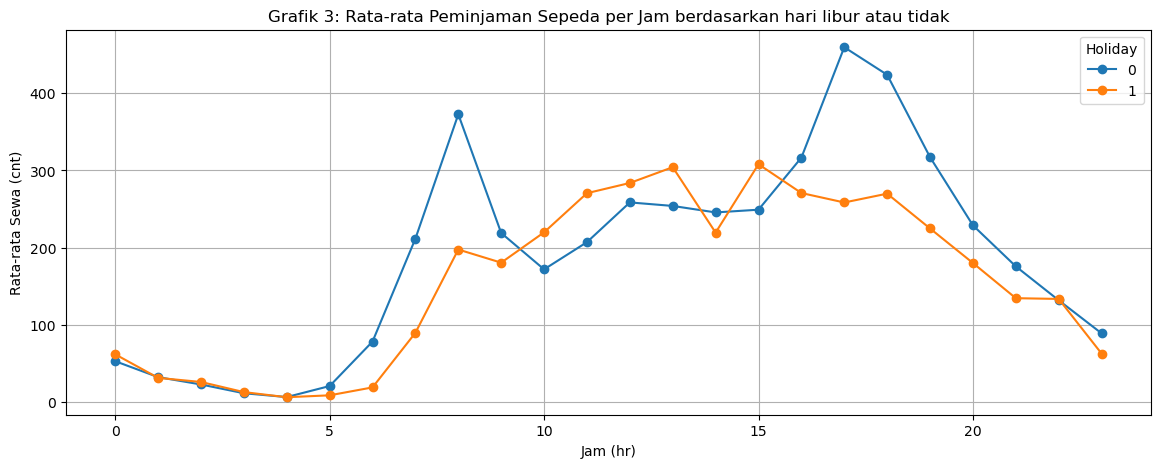

In [577]:
# Visualisasi rata-rata peminjaman sepeda per jam berdasarkan hari libur atau tidak (line chart)
import matplotlib.pyplot as plt

# Buat pivot table (mean)
avg_by_season_pivot = df.pivot_table(
    index='hr',
    columns='holiday',
    values='cnt',
    aggfunc='mean'
).round(2)

# Plot line chart
pivot_plot = avg_by_season_pivot.plot(
    kind='line',
    marker='o',
    figsize=(14, 5)
)

pivot_plot.set_xlabel('Jam (hr)')
pivot_plot.set_ylabel('Rata-rata Sewa (cnt)')
pivot_plot.set_title('Grafik 3: Rata-rata Peminjaman Sepeda per Jam berdasarkan hari libur atau tidak')
plt.legend(title='Holiday')
plt.grid(True)
plt.show()

Beberapa kecenderungan yang bisa kita lihat adalah:

1. Fluktiasi sewa harian: peminjaman rendah di malam hari, naik tajam sekitar 07.00–09.00, lalu kembali memuncak pada 17.00–19.00 seiring pola jam kerja/pulang kantor. Tetapi ketika kita lihat data sewa per jam berdasarkan hari libur dan tidak (grafik 3), pola ini agak berubah karena puncak sewa saat libur justru terjadi 14.00 dan 15.00.

2. Perbedaan antar musim – Musim panas (3) menunjukkan rata-rata sewa lebih tinggi, sedangkan musim dingin (1) lebih rendah. Jika dilihat per jam (di grafik 2), kita melihat bahwa pola peek hour tiap musim cenderung konsisten, peek hour tetap ada di jam pagi (pergi ke kantor/sekolah) dan sore (jam pulang kantor) (1: winter, 2: spring, 3: summer, 4: fall)

3. Cuaca ekstrem (weathersit 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) sangat mempengaruhi peminjaman sepeda. Terlihat bahwa saat hujan badai, rata-rata sewa per jam turun drastis.



**Temperatur & Kelembaban**

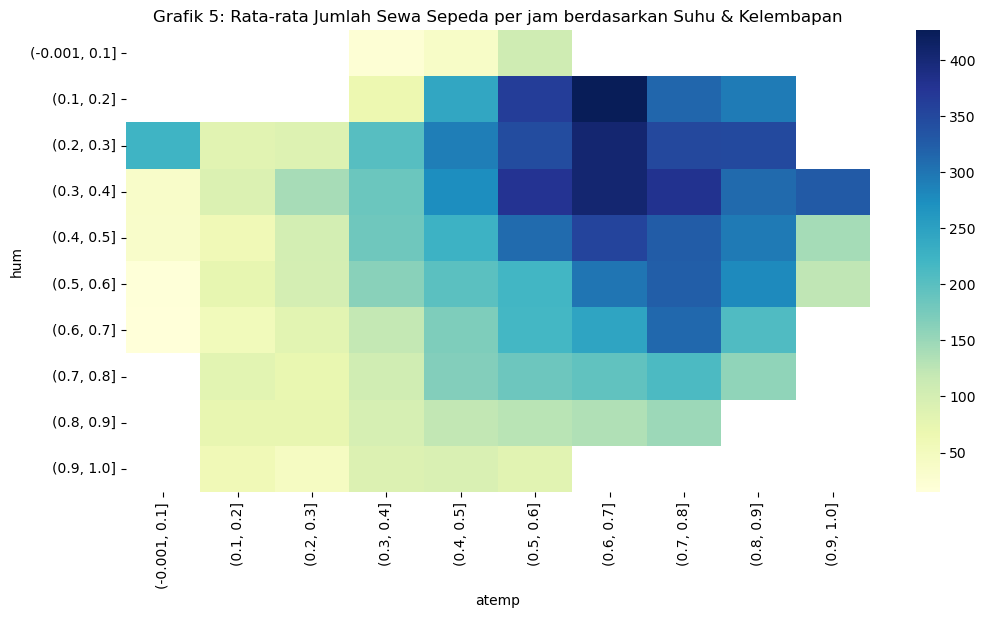

In [578]:
pivot = df.pivot_table(values='cnt', index=pd.cut(df['hum'], 10), columns=pd.cut(df['atemp'], 10), aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Grafik 5: Rata-rata Jumlah Sewa Sepeda per jam berdasarkan Suhu & Kelembapan')
plt.show()

Dalam visualisasi ini terlihat bahwa peminjaman sepeda cenderung tertinggi saat suhu terasa hangat (0.5–0.7) dan kelembapan rendah hingga sedang (0.2–0.4) yaitu di musim panas (summer).

**Perbandingan Pengguna: Casual Vs Registered**

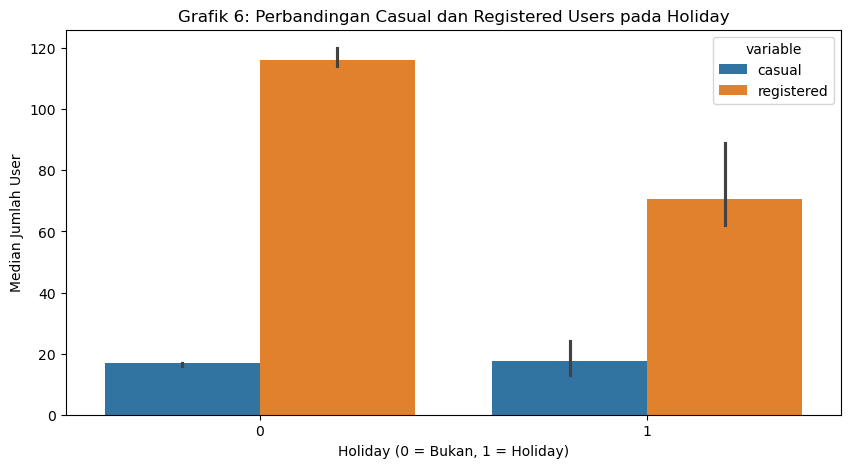

In [579]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.melt(id_vars='holiday', value_vars=['casual','registered']),
            x='holiday', y='value', hue='variable', estimator='median')
plt.title('Grafik 6: Perbandingan Casual dan Registered Users pada Holiday')
plt.xlabel('Holiday (0 = Bukan, 1 = Holiday)')
plt.ylabel('Median Jumlah User')
plt.show()

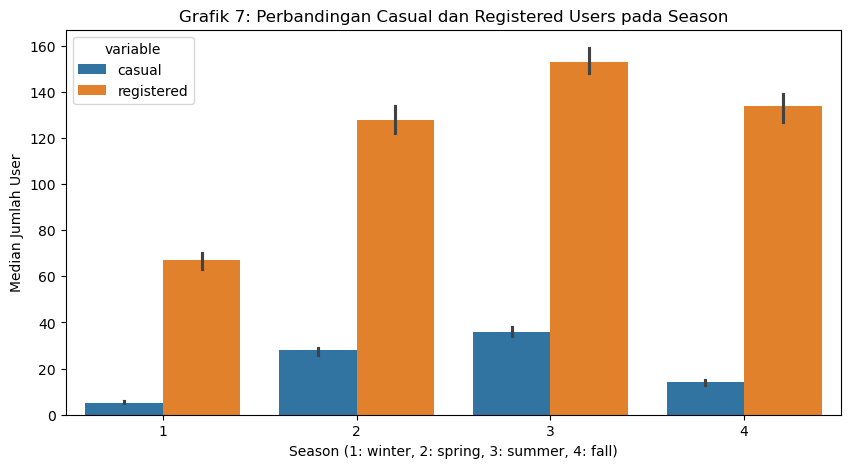

In [580]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.melt(id_vars='season', value_vars=['casual','registered']),
            x='season', y='value', hue='variable', estimator='median')
plt.title('Grafik 7: Perbandingan Casual dan Registered Users pada Season')
plt.xlabel('Season (1: winter, 2: spring, 3: summer, 4: fall)')
plt.ylabel('Median Jumlah User')
plt.show()

Jumlah pengguna registered selalu jauh lebih tinggi dibandingkan casual, baik pada hari libur maupun bukan dan di tiap musim. Kenaikan jumlah penyewa baik casual dan registred mencapai puncak pada musim panas (season:3).

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [581]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [582]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2012-09-14, 2011-08-08]"
1,hum,float64,0,0.0,89,"[0.38, 0.45]"
2,weathersit,int64,0,0.0,4,"[4, 1]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 3]"
5,atemp,float64,0,0.0,65,"[0.9091, 0.3636]"
6,temp,float64,0,0.0,50,"[0.66, 0.38]"
7,hr,int64,0,0.0,24,"[6, 7]"
8,casual,int64,0,0.0,305,"[200, 281]"
9,registered,int64,0,0.0,742,"[704, 638]"


Dari info dataset di atas, semua kolom tampaknya memiliki data alias tidak ada missing data. Sehingga kita tidak perlu run fitur heatmap.

**Menghapus kolom yang tidak dibutuhkan**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar kebutuhan, 'casual' dan 'registered' tidak memiliki relevansi karena keduanya sudah masuk dalam kolom 'cnt' (yaitu total sewa untuk kedua jenis pengguna)
- Fitur 'dteday' sebetulnya juga tidak terlalu berguna kalau sifatnya hanya untuk mengindikasikan tanggal, karena fokus kita memprediksi sewa per jam, bukan per hari.

In [583]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['registered', 'casual', 'dteday'], axis=1, inplace=True)

In [584]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   atemp       12165 non-null  float64
 5   temp        12165 non-null  float64
 6   hr          12165 non-null  int64  
 7   cnt         12165 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 760.4 KB


Sekarang kolom 'registered', 'casual', 'dteday' sudah tidak ada

In [585]:
# Cek kembali dataset info
df_model.isna().sum()

hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
cnt           0
dtype: int64

Selanjutnya, kita juga perlu mengecek apakah terdapat nilai-nilai yang dirasa tidak masuk akal pada setiap fiturnya, misal ada nilai yang kurang dari 0. Kita bisa mengeceknya melalui statistika deskriptif untuk tiap numerikal fitur. 

In [586]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,970.000000


Dari data di atas, tidak terlihat angka negatif, sehingga bisa dikatakan normal. Kita bisa masuk ke tahap selanjutnya.


**Data Correlation**

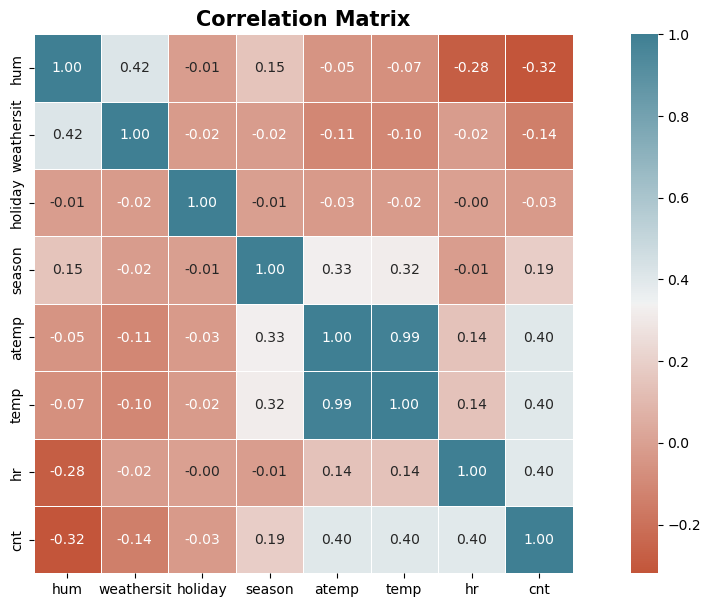

In [587]:
# Correlation matrix
plt.figure(figsize=(15, 7))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');


Jumlah peminjaman sepeda (cnt) memiliki korelasi positif sedang dengan suhu (temp/atemp) dan jam (hr), artinya semakin tinggi suhu yang nyaman dan pada jam tertentu, peminjaman cenderung meningkat. Sementara itu kelembapan (hum) menunjukkan korelasi negatif dengan jumlah peminjaman, menandakan semakin lembap cuaca, peminjaman sepeda cenderung menurun.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

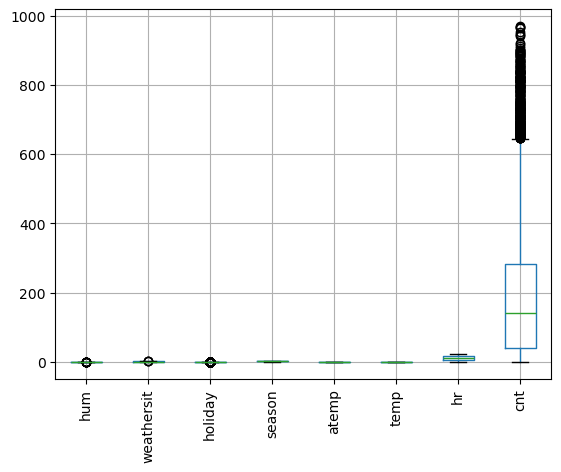

In [588]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

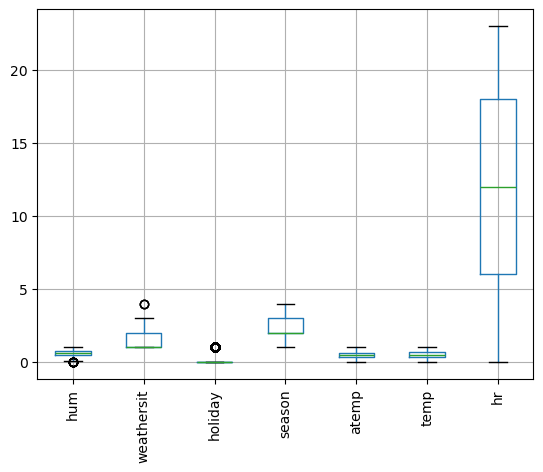

In [589]:
# Exclude kolom 'cnt' dari boxplot
df_model.drop(columns=['cnt']).boxplot(rot=90);

Dari dua visualisasi di atas, bisa disimpulkan bahwa cnt adalah variabel yang memiliki banyak outliers di sisi atas. Distribusinya condong ke kanan (right-skewed), median jauh di bawah nilai maksimumnya.

Weathersit dan holiday memiliki titik di atas whisker mengindikasikan kemungkinan adanya sedikit outliers, tetapi karena ini adalah kolom kategorikal, bukan numerik, ini kita bisa abaikan. Hum, season, atemp, temp, hr distribusinya masih dalam whisker, tidak ada outliers signifikan.

Selanjutnya kita akan fokus membersihkan outliers pada fitur count saja.

**Membersihkan Outlier Count**

In [591]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [592]:
# Outliers pada fitur count
find_anomalies(df_model['cnt'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [593]:
# Cek deskriptif statistik kolom cnt
df_model['cnt'].describe()

count    12165.000000
mean       189.271023
std        181.223903
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: cnt, dtype: float64

In [594]:
# Cek cnt > 645
df_model[df_model['cnt'] > 321.5].count()['cnt']

np.int64(2436)

Terlihat bahwa 75% data pada kolom cnt bernilai kurang dari 282, sedangkan nilai maksimalnya adalah 970. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 2436 data yang nilai price-nya lebih besar dari 645.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki count lebih besar dari 645 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

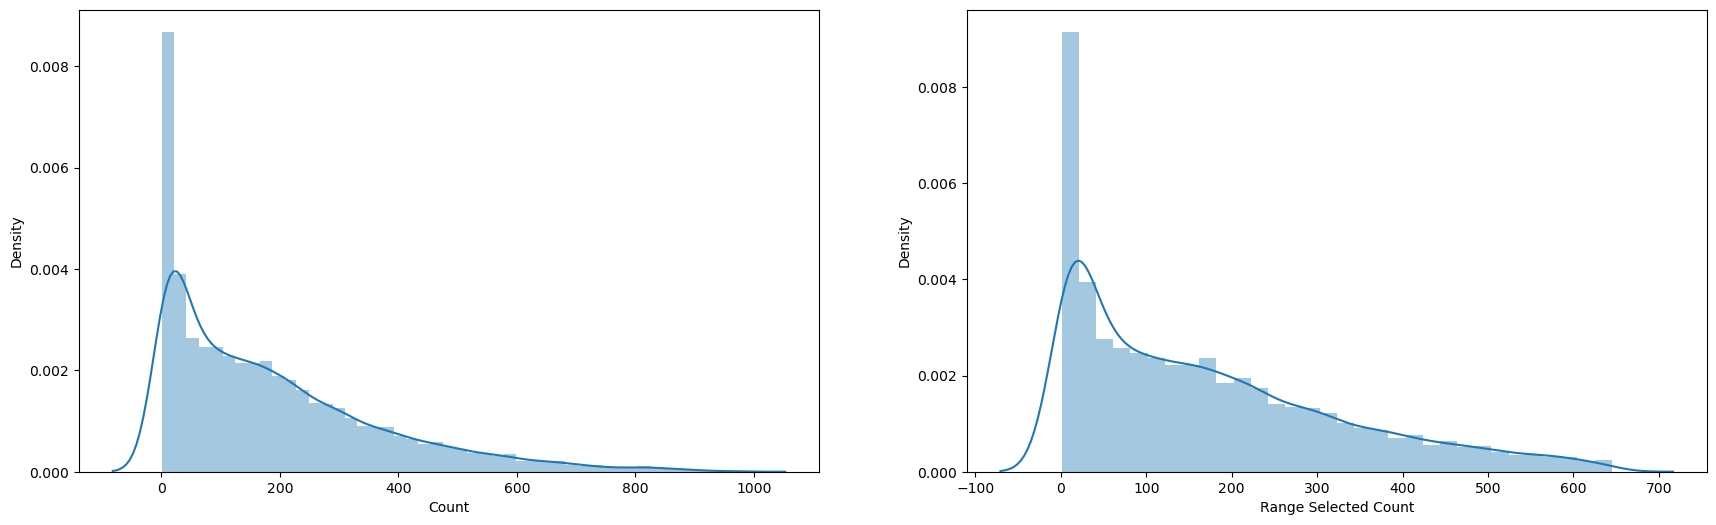

In [595]:
# Melakukan filtering pada data
df_model = df_model[(df_model['cnt'] <= 645)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['cnt'], ax=axes[1])
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Selected Count');

In [596]:
# Cek deskriptif statistik kolom 'cnt' setelah filtering
df_model['cnt'].describe()

count    11827.000000
mean       173.211634
std        155.922696
min          1.000000
25%         37.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: cnt, dtype: float64

**Clean Dataset**

In [597]:
# Cek dataset yang sudah bersih
df_model.head()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
0,0.62,1,0,4,0.3485,0.36,16,250
1,0.64,1,0,2,0.5152,0.54,4,18
2,0.53,1,0,2,0.6212,0.62,23,107
3,0.87,2,0,2,0.3485,0.36,8,145
5,0.72,1,0,4,0.4545,0.46,0,45


In [598]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11827 entries, 0 to 12164
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         11827 non-null  float64
 1   weathersit  11827 non-null  int64  
 2   holiday     11827 non-null  int64  
 3   season      11827 non-null  int64  
 4   atemp       11827 non-null  float64
 5   temp        11827 non-null  float64
 6   hr          11827 non-null  int64  
 7   cnt         11827 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 831.6 KB


Pada akhirnya, tersisa 11827 baris data yang akan digunakan untuk pemodelan. 

### **Modeling**

In [600]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [601]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(handle_unknown='ignore'), ['season', 'weathersit', 'holiday']),
    # holiday sudah numerik (0/1), jadi tidak perlu di-encode
], remainder='passthrough')

In [602]:
# Fit & transform data
encoded = transformer.fit_transform(X_train)

# Ambil nama kolom hasil transform
feature_names = transformer.get_feature_names_out()

# Masukkan ke DataFrame
encoded_df = pd.DataFrame(encoded, columns=feature_names)

print(encoded_df.head())


   One Hot__season_1  One Hot__season_2  One Hot__season_3  One Hot__season_4  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                1.0                0.0                0.0                0.0   
3                1.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   One Hot__weathersit_1  One Hot__weathersit_2  One Hot__weathersit_3  \
0                    1.0                    0.0                    0.0   
1                    1.0                    0.0                    0.0   
2                    0.0                    0.0                    1.0   
3                    0.0                    1.0                    0.0   
4                    0.0                    1.0                    0.0   

   One Hot__weathersit_4  One Hot__holiday_0  One Hot__holiday_1  \


**Data Splitting**

In [603]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['cnt'], axis=1)
y = df_model['cnt']

**Train and Test Splitting**

In [606]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [607]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-147.99433658 -146.45910295 -139.4149796  -140.20201339 -144.57732659] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-101.48108545  -99.803348    -95.31878154  -94.71011481  -98.35724514] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.36003364 -1.3813692  -1.43303529 -1.33204469 -1.42947387] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-101.83819534 -101.01252594  -97.61724341 -101.172388   -103.21984355] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-67.31552236 -65.88213464 -63.59184166 -66.03872765 -68.55241066] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRe

In [608]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-143.729552,3.388705,-97.934115,2.587981,-1.387191,0.039248
1,KNN Regressor,-100.972039,1.849286,-66.276127,1.654012,-0.787762,0.052383
2,DecisionTree Regressor,-120.994522,2.053410,-78.955249,1.006107,-1.020023,0.025644
3,RandomForest Regressor,-94.517215,1.530510,-61.730566,0.858207,-0.694953,0.028408
4,XGBoost Regressor,-90.644083,1.838490,-59.418811,1.129411,-0.648918,0.030144


Berdasarkan hasil evaluasi model regresi pada dataset bike sharing:

1. XGBoost memberikan performa terbaik dengan error terendah dibanding model lain.

2. Random Forest juga cukup kuat dan stabil meskipun sedikit lebih tinggi error-nya dibanding XGBoost.

3. Linear Regression memiliki performa terburuk karena error paling besar, menunjukkan hubungan data tidak cukup linear.

Kesimpulan: Model XGBoost Regressor merupakan pilihan terbaik untuk memodelkan data bike sharing, sedangkan Random Forest adalah pilihan kedua.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [609]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,87.696384,60.351864,0.958984
RandomForest,92.416916,62.870977,0.923292


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari Random Forest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [610]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [614]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [615]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['season',
                                                                                'weathersit',
                                                                                'holiday'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [616]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,0.085568,0.005558,0.007643,0.004554,0.6,0.001000,190,5,0.04,9,...,0.567892,1,-0.880295,-0.986190,-0.983371,-0.898810,-0.910719,-0.931877,0.044279,1
7,0.113283,0.011152,0.010265,0.002997,0.9,0.059948,119,8,0.05,5,...,0.555978,2,-0.899442,-0.948939,-1.029432,-0.901887,-0.907353,-0.937411,0.049412,2
23,0.045150,0.004987,0.004815,0.000594,0.9,3.593814,153,4,0.33,9,...,0.662157,4,-1.128294,-1.224790,-1.310843,-1.052413,-1.126186,-1.168505,0.089792,9
22,0.050953,0.005019,0.005943,0.001921,0.7,0.002783,155,4,0.25,8,...,0.318033,5,-1.121031,-1.150223,-1.262002,-1.173303,-1.034449,-1.148201,0.073841,5
20,0.049995,0.007891,0.004132,0.000105,0.9,0.007743,143,4,0.38,6,...,0.449550,3,-1.001531,-1.146621,-1.150704,-1.001091,-1.003616,-1.060713,0.071827,3


In [617]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -86.39323272705079
Best_params: {'model__subsample': np.float64(0.6), 'model__reg_alpha': np.float64(0.001), 'model__n_estimators': np.int64(190), 'model__max_depth': np.int64(5), 'model__learning_rate': np.float64(0.04), 'model__gamma': np.int64(9), 'model__colsample_bytree': np.float64(0.9)}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [619]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,85.861475,59.184265,0.893305


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [620]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,87.696384,60.351864,0.958984


In [621]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,85.861475,59.184265,0.893305


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning:  87.69	60.35	0.95
- RMSE, MAE & MAPE setelah tuning: 	85.86	59.18	0.89




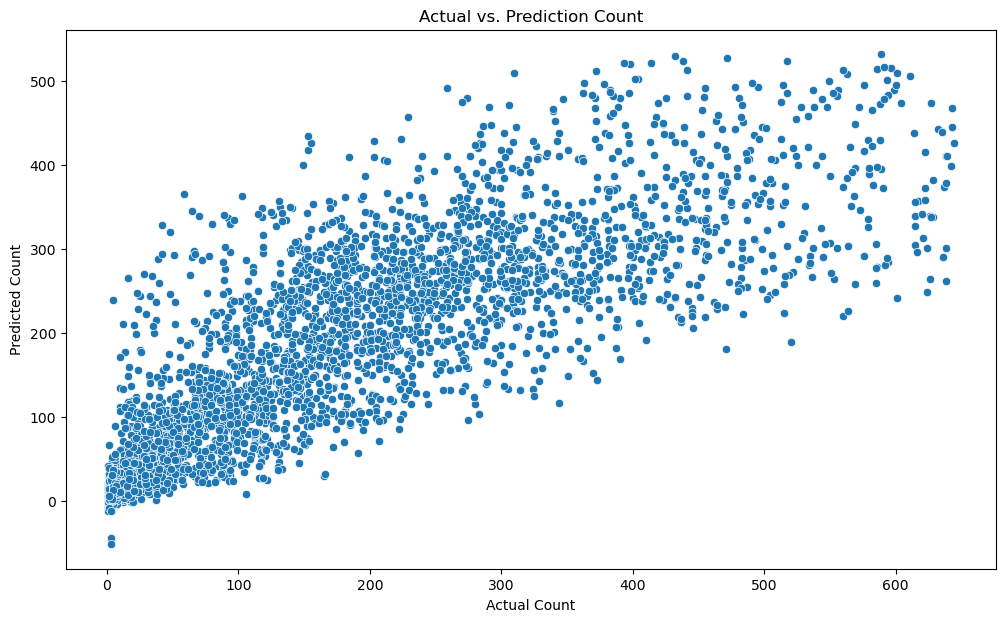

In [622]:
plt.figure(figsize=(12, 7))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

Titik-titik cenderung membentuk garis diagonal, menunjukkan korelasi positif yang kuat antara hitungan aktual dan prediksi. Ini adalah tanda bahwa model telah belajar dengan baik.Sebagian besar titik terpusat di sekitar garis y=x (garis sempurna), terutama di kisaran 100 hingga 400, yang menunjukkan prediksi yang baik di sebagian besar rentang data. Hanya saja semakin tinggi actual count, semakin besar jarak antara actual vs prediction.

**Fitur yang paling berpengaruh**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

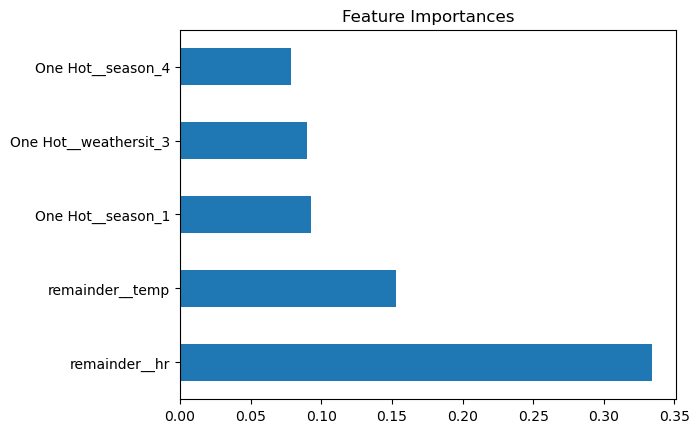

In [623]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning.named_steps['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Analisis hasil prediksi regresi XGBoost untuk sewa sepeda per jam menunjukkan bahwa model memiliki tingkat kesalahan yang moderat hingga baik, namun terdapat tantangan signifikan dalam memprediksi jumlah sewa yang sangat tinggi dan jumlah sewa yang mendekati nol, yang konsisten dengan karakteristik distribusi data target.

1. Mean Absolute Error (MAE) 59.18, yang berarti prediksi meleset rata-rata sekitar 59 sepeda per jam, menunjukkan kinerja yang cukup baik pada sebagian besar data. 
2. Root Mean Squared Error (RMSE) 85.86 yang jauh lebih tinggi mengindikasikan bahwa model membuat kesalahan-kesalahan besar (outlier), kemungkinan karena gagal memprediksi permintaan sewa yang sangat tinggi. 
3. Mean Absolute Percentage Error (MAPE) 89.33% terlihat sangat tinggi, tetapi ini wajar dan tidak mencerminkan akurasi sesungguhnya karena data sangat condong ke kanan dengan banyak nilai sewa mendekati nol, di mana kesalahan kecil saja menghasilkan persentase kesalahan yang besar.

**Faktor yang mempengaruhi sewa sepeda**

Berdasarkan pemodelan yang sudah dilakukan, fitur hr (jam), temp (suhu), musim, dan weathersit (kondisi cuaca) menjadi faktor yang paling berpengaruh terhadap jumlah peminjaman sepeda (cnt). Hal ini sesuai dengan intuisi, karena jam sibuk, kondisi cuaca, serta suhu udara memang berpengaruh langsung pada perilaku penyewaan.

**Kesimpulan**

Hasil ini cukup baik untuk model awal (baseline), tetapi bukan yang terbaik dan memiliki ruang signifikan untuk perbaikan. Secara umum, MAE 59.18 menunjukkan model dapat digunakan untuk alokasi sumber daya secara kasar, tetapi akurasi perlu ditingkatkan untuk manajemen inventaris yang optimal.


### **Recommendations**

1. A/B Testing: Uji efektivitas model terhadap baseline sederhana (misalnya rata-rata historis) untuk memastikan manfaat penggunaan model dalam memprediksi permintaan sepeda.

2. Analisis Error: Identifikasi prediksi dengan error tertinggi (overestimation & underestimation) untuk menemukan pola variabel yang paling berpengaruh terhadap kesalahan prediksi.

3. Feature Engineering & Data Tambahan: Tambahkan fitur waktu (misalnya senin, selasa, dan seterusnya) untuk menemukan apakah ada pola weekly dari peminjaman sepeda). Kita juga bisa menambahkan variabel interaksi (misalnya suhu × cuaca), serta data eksternal (event kota, transportasi publik) untuk meningkatkan akurasi.

4. Pengembangan Model Lanjutan: Eksperimen dengan model ensemble (XGBoost, Random Forest) atau neural networks berbasis time series jika tersedia lebih banyak data.

****

#### **Save Model**

In [625]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_BikeSharing_XGB_CF.sav', 'wb'))

In [626]:
# Load model
filename = 'Model_BikeSharing_XGB_CF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [627]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(87.6963839717394)